In [151]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.aqua.operators import CircuitStateFn
#from qiskit.aqua.operators import *
from qiskit.aqua.operators.gradients import QFI
from qiskit.circuit import QuantumCircuit, ParameterVector

In [152]:
numQubits = 4
num_params = 3

In [153]:
params = ParameterVector('theta', length=num_params)
it = iter(params)

In [154]:
 qf = QuantumCircuit(QuantumRegister(numQubits)) #, numQubits)

In [155]:
def make_circuit_feature():
    for i in range(numQubits):
        qf.h(i)
    qf.barrier()
    #return qf

In [156]:
def add_layerRZ(theta):
    for i in range(numQubits):
        qf.rz(theta, i)
    qf.barrier()
    #return qf

In [157]:
def add_layerRZZ(theta):
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
            qf.rz((pi-theta)*(pi-theta), j)
            qf.cx(i, j)
            qf.barrier()
    #return qf

In [158]:
def add_layerRY(theta):
    qf.ry(theta, range(numQubits))
    qf.barrier()

In [159]:
def add_cnots():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
    qf.barrier()
    #return qv

In [160]:
def final_circuit():
    make_circuit_feature()
    theta_1 = next(it)
    add_layerRZ(theta_1)
    add_layerRZZ(theta_1)
    add_layerRY(next(it))
    add_cnots()
    add_layerRY(next(it))  

In [161]:
final_circuit()

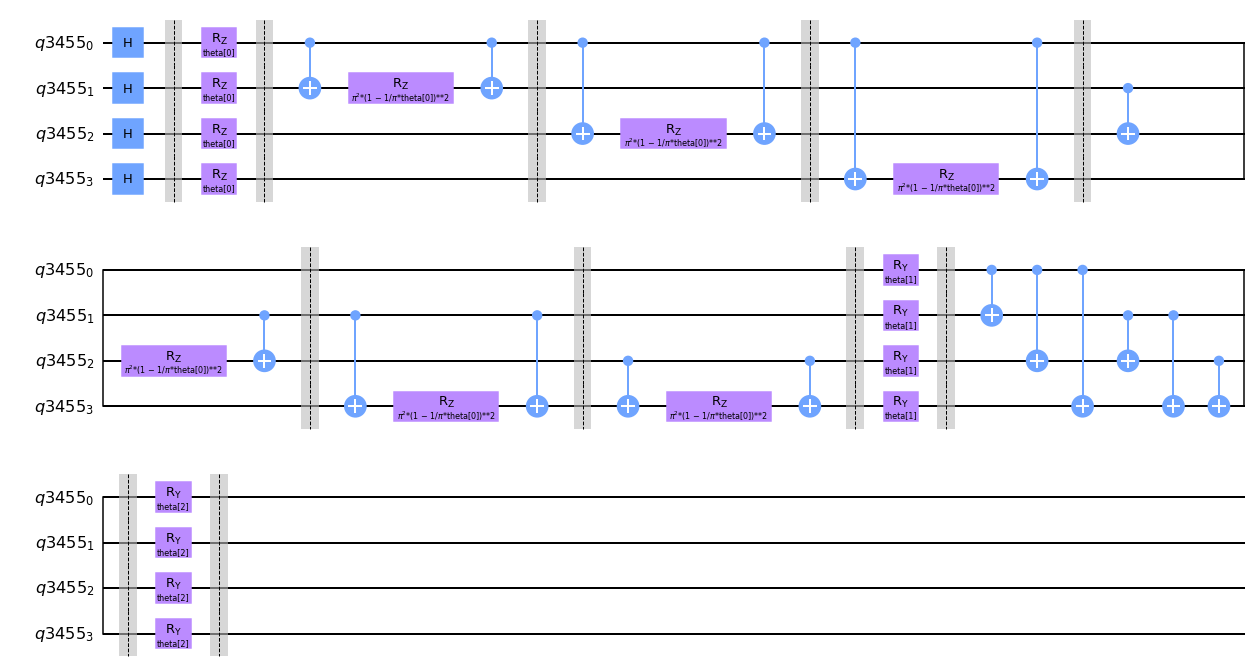

In [162]:
qf.draw('mpl')

In [163]:
state = CircuitStateFn(primitive=qf, coeff=1.)

In [164]:
qfi = qiskit.aqua.operators.gradients.QFI(qfi_method='lin_comb_full').convert(operator=state, params=params.params)

In [165]:
values_dict = {params: [pi / 4, 0.1, 0.1]} 

In [166]:
qfi_result = qfi.assign_parameters(values_dict).eval()

In [167]:
print('full QFI \n', np.real(np.array(qfi_result)))

full QFI 
 [[ 8.15437956e+02 -1.58151968e-15 -6.96652888e+00]
 [-1.58151968e-15  9.15094158e-01  4.29612327e-01]
 [-6.96652888e+00  4.29612327e-01  9.42731700e-01]]
